<a href="https://colab.research.google.com/github/KNmitra/Bhavcopy/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:

from urllib.request import urlopen,Request 
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


<Figure size 720x576 with 0 Axes>

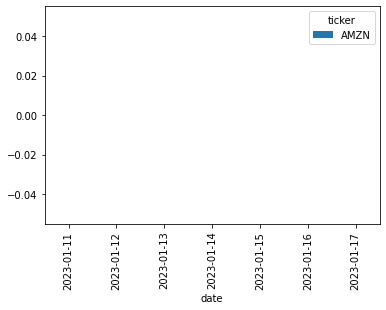

In [58]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN','FB','AMD']
news_tables ={}

for ticker in tickers :
    url = finviz_url + ticker

    req = Request (url = url,headers ={'user-agent':'my-app'})
    response = urlopen(req)

    #print(response)
    html = BeautifulSoup(response,'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    break
"""
print(news_tables)

amzn_data = news_tables['AMZN']
amzn_rows = amzn_data.findAll('tr')
#print(amzn_rows)

for index,row in enumerate(amzn_rows):
    title = row.a.text
    timestamp = row.td.text
    print(timestamp + "" + title)
"""
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time =date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker,date,time,title])
    
    #print(parsed_data)


    df = pd.DataFrame(parsed_data,columns =['ticker','date','time','title'])
    
    vader = SentimentIntensityAnalyzer()
    f = lambda title:vader.polarity_scores('title')['compound']
    df['compound'] = df['title'].apply(f)

    df['date']=pd.to_datetime(df.date).dt.date

    plt.figure(figsize=(10,8))

    mean_df = df.groupby(['ticker','date']).mean()

    mean_df = mean_df.unstack()
    mean_df =mean_df.xs('compound',axis = 'columns').transpose()
    mean_df.plot(kind='bar')
    plt.show()
    

# New Section